<a href="https://colab.research.google.com/github/CHOISEONGGU/MachineLearning_ChoiSG/blob/main/CHOISEONGGU/MachineLearning_ChoiSG/tree/main/%EB%B3%B5%EC%8A%B5/ch08_ML_%EB%B3%B5%EC%8A%B5_01%2B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝

In [ ]:
import graphviz

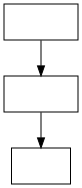

In [ ]:
di = graphviz.Digraph()
di.node("인공지능", shape='box') # 인간의 동작이나 사고 방식을 따라한(모사한) 프로그램 -> 모델
di.node("머신러닝", shape='box') # 모델링에 있어서 데이터 기반으로 통계적/수학적 기법을 사용하여서 기계적으로 최적의 답을 찾는 기법
di.node("딥러닝", shape='box') # 머신러닝의 한 분과로, '인공신경망'을 사용해서 모델링을 하는 기법
di.edge("인공지능", "머신러닝")
di.edge("머신러닝", "딥러닝")
di

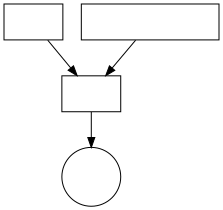

In [ ]:
di = graphviz.Digraph()
di.node("데이터", shape='box')
di.node("인간이 작성한 모델", shape='box')
di.node("컴퓨터", shape='box')
di.node("결과", shape='circle')
di.edge("데이터", "컴퓨터")
di.edge("인간이 작성한 모델", "컴퓨터")
di.edge("컴퓨터", "결과")
di

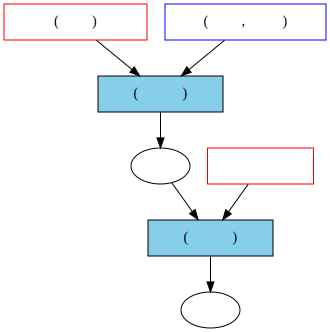

In [ ]:
di = graphviz.Digraph()
a1 = "샘플 데이터(관측값)"
a2 = "정답값(목표값, 예측값)"
a3 = "컴퓨터(머신러닝)"
di.node(a1, shape='box', color='red')
di.node(a2, shape='box', color='blue')
di.node(a3, shape='box', fillcolor='skyblue',  style='filled')
di.edge(a1, a3)
di.edge(a2, a3)
b1 = "모델"
b2 = "새로운 데이터"
b3 = "컴퓨터(프로그램)"
b4 = "결과"
di.node(b2, shape='box', color='red')
di.node(b3, shape='box', fillcolor='skyblue',  style='filled')
di.edge(a3, b1)
di.edge(b1, b3)
di.edge(b2, b3)
di.edge(b3, b4)
di

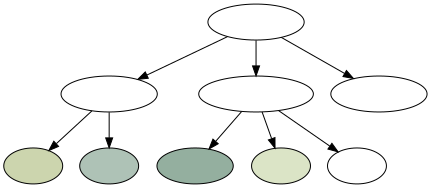

In [ ]:
# https://colorhunt.co/
# https://coolors.co/
# https://frhyme.github.io/python-lib/graphviz/
di = graphviz.Digraph()
t = '머신러닝'
a1 = '지도학습'
a1_b1 = '분류'
a1_b2 = '회귀'
a2 = '비지도학습'
a2_b1 = '군집화'
a2_b2 = '변환'
a2_b3 = '추천'
a3 = '강화학습'
di.node(a1_b1, fillcolor='#CCD5AE', style='filled')
di.node(a1_b2, fillcolor='#AEC2B6', style='filled')
di.node(a2_b1, fillcolor='#94AF9F', style='filled')
di.node(a2_b2, fillcolor='#DBE4C6', style='filled')
di.edge(t, a1)
di.edge(a1, a1_b1)
di.edge(a1, a1_b2)
di.edge(t, a2)
di.edge(a2, a2_b1)
di.edge(a2, a2_b2)
di.edge(a2, a2_b3)
di.edge(t, a3)
di

# 선형회귀

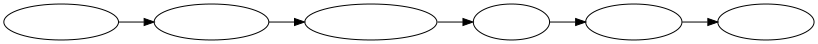

In [ ]:
di = graphviz.Source(
    """
    digraph graphname {
    rankdir=LR;
    데이터수집 -> 데이터탐색 -> 데이터전처리 -> 모델링 -> 모델평가 -> 모델배포
    }
    """
)
di

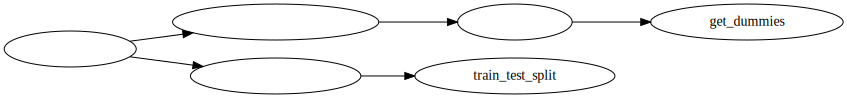

In [ ]:
di = graphviz.Source(
    """
    digraph graphname {
    rankdir=LR;
    데이터전처리 -> 명목형범주형변수처리 -> 원핫인코딩 -> 더미변수get_dummies;
    데이터전처리 -> 훈련셋시험셋분리 -> 사이킷런train_test_split;
    }
    """
    # object형에 대한 변수처리 -> pd.get_dummies -> 원-핫인코딩 -> 열의 개수 줄이고 싶으면? drop_first=True
    # 모델이 데이터에 너무 100% 맞으면, 새로운 데이터에 대한 적응력이 떨어짐 -> 데이터 중에 일부를 훈련셋/시험셋으로 나눠서 (7:3, 8:2) 사용
    # X_train, X_test, y_train, y_test. -> X-독립변수,관측값 (df) y-종속변수,예측값,목표값,타깃값 (s)
)
di

## 모델 사용 시 유의점
1. 선형회귀(Linear Regression)은 종속변수 y가 연속형 변수(실수형 숫자)일 때 사용한다 (회귀 문제)
1. 선형회귀는 독립변수 X들 간의 독립성을 전제하고, X와 y간의 선형적 관계를 전제한다. -> 최적의 곡선 1개로 독립변수들과 종속변수 간의 관계를 표현
    1. 독립변수들(목표값이 되는 열 y를 제외한 나머지 열들)간의 관계는 낮은 상관성을 가져야 한다. -> 상관성 -> a라는게 움직일 때 b가 얼마나 비슷하게 움직이는지 (x라는 독립변수가 y에게 영향이 미치는지가 불투명해짐 -> 다중공산성)
    1. X들이 움직이는 걸 통해서, y가 비례하거나 반비례하게 움직여야 한다. (변곡점이 1개 이상 있는 형태)

## 모델 평가 (회귀의 경우)
* RMSE(MSE), R^2 -> 선형회귀에만 주로 보임
* `from sklearn.metrics import mean_squared_error`
* **RMSE(MSE)** -> 꾸준히 등장 (실제값과 예측값 사이의 차이를 통계적 기법으로 표현)
* R^2 : 직선이 그어져야만 확인 가능
---
선형회귀? -> 설명력이 좋다 (예측력에 비해) -> 계수(특정한 변수들이 얼마나 영향을 미치는지 수치로 표현하기 좋음) -> `model.coef_`

# 로지스틱 회귀

* 선형 회귀 -> 직선 -> 0, 1 이진분류 나누기 애매 -> 로지스틱 함수 -> 분류
* 이진 분류 (0과 1로 나뉘는 결과값<-예측값)
<br><-> 선형회귀 (예측값이 연속형 변수)
* 선형회귀를 변형한 것이기 때문에, '예측값'을 제외한 나머지 제약조건을 모두 선형회귀와 공유
* model.coef_ -> 계수. `[[]]` 이중 배열로 표현되기 때문에, 한 꺼풀 걷어내서 사용해줘야함
* 평가 : `from sklearn.metrics import accuracy_score` (예측값-실제값이 얼마나 일치하는지 -> 0,1로만 나오니까)

## 결측치
cf) 결측치, 이상치
* 결측치 -> 특정한 행, 특정한 열을 못쓰게 만듦 -> 데이터가 귀중
* 결측치를 어떻게 대응할 것이냐?(사람마다 조금씩 다름)
1. 10% 미만 -> 행을 지워

## 결측치
cf) 결측치, 이상치
* 결측치 -> 특정한 행, 특정한 열을 못쓰게 만듦 -> 데이터가 귀중
* 결측치를 어떻게 대응할 것이냐? (열 기준)
    * 10% 미만
        * 행을 삭제하거나 (열이 너무 중요한 데이터 -> 평균치나 다른 값으로 넣으면 왜곡됨)
        * 최빈값, 평균치를 덮어씌워버림
        * (없음)으로 넣어버림
    * 25% 내외
        * 평균치나 최빈값? -> 다른 열들을 활용해서 그룹으로 나눠서 해당 그룹의 대표값
        * (없음)으로 넣어버림
    * 70~80% 비어있음
        * 열을 삭제
        * (없음)으로 넣어버림